# April 17th, 2022 (register RABIES)

**Motivation**: Run the big loop and save tx for session 2 only. <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from numpy.ma import masked_where as mwh
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
fig_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = 'Documents/workspaces/lfr/binary_overlapping'
lfr_dir = pjoin(os.environ['HOME'], lfr_dir)

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.fourier import *
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# set style & no interpolalation
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice((128), full_load=True, load_parcel=True, load_allen=True)
mice.setup_anat_data()

[PROGRESS] 'config.json' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0

ROI lookup not found, time to run organize_func() . . .

combine metadata not found, time to run cat_data() . . .

In [3]:
kwargs = {
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.25, 0.30, 0.35, 0.38, 0.40, 0.42, 0.45, 0.5, 0.60],
    'syn_bins': [64, 48, 32],
    'aff_bins': [13, 20, 25, 32],
    'aff_rates': [0.2, 0.4, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10,
}
kwargs

{
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.25, 0.3, 0.35, 0.38, 0.4, 0.42, 0.45, 0.5, 0.6],
    'syn_bins': [64, 48, 32],
    'aff_bins': [13, 20, 25, 32],
    'aff_rates': [0.2, 0.4, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10
}

In [4]:
from register.register import *
reg = Register(mice)

## Begin

Apr 7th, 2022, 09:31 AM

 bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


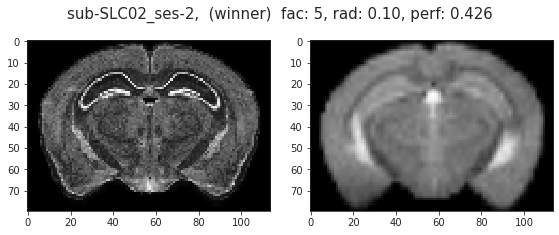

sub-SLC02_ses-2, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    6  SyN  0.45       48       13       0.2       mi 0.520428
    6  SyN  0.45       48       13       0.2  ovp_MOp 0.983441
    6  SyN  0.45       48       13       0.2  sym_MOp 0.903678
    6  SyN  0.45       48       13       0.2  ovp_MOs 0.995560
    6  SyN  0.45       48       13       0.2  sym_MOs 0.895623
    6  SyN  0.45       48       13       0.2   ovp_SS 0.998397
    6  SyN  0.45       48       13       0.2   sym_SS 0.991066
    6  SyN  0.45       48       13       0.2 ovp_VISC 1.000000
    6  SyN  0.45       48       13       0.2 sym_VISC 0.980952
    6  SyN  0.45       48       13       0.2  ovp_VIS 0.998047
    6  SyN  0.45       48       13       0.2  sym_VIS 0.992218
    6  SyN  0.45       48       13       0.2   ovp_AI 0.964789
    6  SyN  0.45       48       13       0.2   sym_AI 1.000000
    6  SyN  0.45       48       13       0.2 ovp_PTLp 1.000000
    6  SyN  0.45       48       13       0.2 sym_PTLp 0.962963
    6  SyN  0.45       48       13       0.2  ovp_TEa 1.000000
    6  SyN  0.45       48       13       0.2  sym_TEa 0.976744
    6  SyN  0.45       48       13       0.2  ovp_CA1 1.000000
    6  SyN  0.45       48       13       0.2  sym_CA1 0.928753
    6  SyN  0.45       48       13       0.2  ovp_CLA 1.000000
    6  SyN  0.45       48       13       0.2  sym_CLA 0.878788
    6  SyN  0.45       48       13       0.2 ovp_STRd 1.000000
    6  SyN  0.45       48       13       0.2 sym_STRd 0.892726
    6  SyN  0.45       48       13       0.2  ovp_iso 0.992681
    6  SyN  0.45       48       13       0.2  sym_iso 0.991152
    6  SyN  0.45       48       13       0.2      sym 0.946231
    6  SyN  0.45       48       13       0.2      ovp 0.995126

 bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


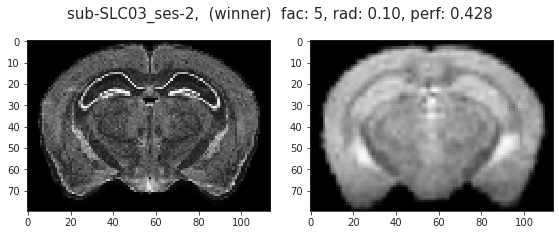

sub-SLC03_ses-2, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    8  SyN  0.25       48       32       0.2       mi 0.520844
    8  SyN  0.25       48       32       0.2  ovp_MOp 0.985650
    8  SyN  0.25       48       32       0.2  sym_MOp 0.994633
    8  SyN  0.25       48       32       0.2  ovp_MOs 0.990179
    8  SyN  0.25       48       32       0.2  sym_MOs 0.921098
    8  SyN  0.25       48       32       0.2   ovp_SS 0.992549
    8  SyN  0.25       48       32       0.2   sym_SS 0.999379
    8  SyN  0.25       48       32       0.2 ovp_VISC 0.995595
    8  SyN  0.25       48       32       0.2 sym_VISC 0.991228
    8  SyN  0.25       48       32       0.2  ovp_VIS 1.000000
    8  SyN  0.25       48       32       0.2  sym_VIS 0.991243
    8  SyN  0.25       48       32       0.2   ovp_AI 0.937922
    8  SyN  0.25       48       32       0.2   sym_AI 0.976000
    8  SyN  0.25       48       32       0.2 ovp_PTLp 1.000000
    8  SyN  0.25       48       32       0.2 sym_PTLp 0.947826
    8  SyN  0.25       48       32       0.2  ovp_TEa 1.000000
    8  SyN  0.25       48       32       0.2  sym_TEa 0.881250
    8  SyN  0.25       48       32       0.2  ovp_CA1 1.000000
    8  SyN  0.25       48       32       0.2  sym_CA1 0.875278
    8  SyN  0.25       48       32       0.2  ovp_CLA 1.000000
    8  SyN  0.25       48       32       0.2  sym_CLA 0.966667
    8  SyN  0.25       48       32       0.2 ovp_STRd 1.000000
    8  SyN  0.25       48       32       0.2 sym_STRd 0.985345
    8  SyN  0.25       48       32       0.2  ovp_iso 0.988334
    8  SyN  0.25       48       32       0.2  sym_iso 0.976449
    8  SyN  0.25       48       32       0.2      sym 0.970783
    8  SyN  0.25       48       32       0.2      ovp 0.991607

 bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


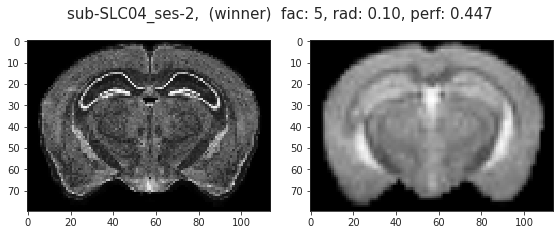

sub-SLC04_ses-2, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    7  SyN  0.38       64       32       0.2       mi 0.520412
    7  SyN  0.38       64       32       0.2  ovp_MOp 0.997220
    7  SyN  0.38       64       32       0.2  sym_MOp 0.961818
    7  SyN  0.38       64       32       0.2  ovp_MOs 0.997290
    7  SyN  0.38       64       32       0.2  sym_MOs 0.952381
    7  SyN  0.38       64       32       0.2   ovp_SS 0.998301
    7  SyN  0.38       64       32       0.2   sym_SS 0.997172
    7  SyN  0.38       64       32       0.2 ovp_VISC 0.995833
    7  SyN  0.38       64       32       0.2 sym_VISC 0.951220
    7  SyN  0.38       64       32       0.2  ovp_VIS 0.989992
    7  SyN  0.38       64       32       0.2  sym_VIS 0.998462
    7  SyN  0.38       64       32       0.2   ovp_AI 0.978289
    7  SyN  0.38       64       32       0.2   sym_AI 0.992366
    7  SyN  0.38       64       32       0.2 ovp_PTLp 1.000000
    7  SyN  0.38       64       32       0.2 sym_PTLp 0.903226
    7  SyN  0.38       64       32       0.2  ovp_TEa 0.993080
    7  SyN  0.38       64       32       0.2  sym_TEa 0.979452
    7  SyN  0.38       64       32       0.2  ovp_CA1 1.000000
    7  SyN  0.38       64       32       0.2  sym_CA1 0.858974
    7  SyN  0.38       64       32       0.2  ovp_CLA 1.000000
    7  SyN  0.38       64       32       0.2  sym_CLA 0.966667
    7  SyN  0.38       64       32       0.2 ovp_STRd 1.000000
    7  SyN  0.38       64       32       0.2 sym_STRd 0.984171
    7  SyN  0.38       64       32       0.2  ovp_iso 0.993638
    7  SyN  0.38       64       32       0.2  sym_iso 0.966839
    7  SyN  0.38       64       32       0.2      sym 0.971524
    7  SyN  0.38       64       32       0.2      ovp 0.996278

 bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


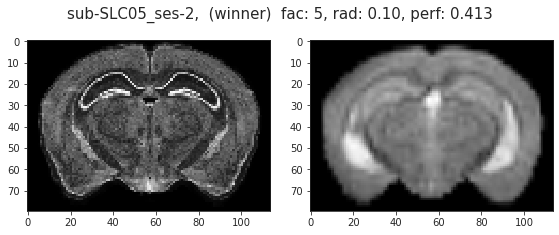

sub-SLC05_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    3 ElasticSyN  0.45       48       32       0.8       mi 0.518692
    3 ElasticSyN  0.45       48       32       0.8  ovp_MOp 0.997227
    3 ElasticSyN  0.45       48       32       0.8  sym_MOp 0.992634
    3 ElasticSyN  0.45       48       32       0.8  ovp_MOs 0.996180
    3 ElasticSyN  0.45       48       32       0.8  sym_MOs 0.971751
    3 ElasticSyN  0.45       48       32       0.8   ovp_SS 0.997373
    3 ElasticSyN  0.45       48       32       0.8   sym_SS 0.991860
    3 ElasticSyN  0.45       48       32       0.8 ovp_VISC 0.995556
    3 ElasticSyN  0.45       48       32       0.8 sym_VISC 0.939655
    3 ElasticSyN  0.45       48       32       0.8  ovp_VIS 0.997407
    3 ElasticSyN  0.45       48       32       0.8  sym_VIS 0.998273
    3 ElasticSyN  0.45       48       32       0.8   ovp_AI 0.950213
    3 ElasticSyN  0.45       48       32       0.8   sym_AI 0.991501
    3 ElasticSyN  0.45       48       32       0.8 ovp_PTLp 1.000000
    3 ElasticSyN  0.45       48       32       0.8 sym_PTLp 0.924370
    3 ElasticSyN  0.45       48       32       0.8  ovp_TEa 0.989547
    3 ElasticSyN  0.45       48       32       0.8  sym_TEa 0.965753
    3 ElasticSyN  0.45       48       32       0.8  ovp_CA1 1.000000
    3 ElasticSyN  0.45       48       32       0.8  sym_CA1 0.989446
    3 ElasticSyN  0.45       48       32       0.8  ovp_CLA 1.000000
    3 ElasticSyN  0.45       48       32       0.8  sym_CLA 0.903226
    3 ElasticSyN  0.45       48       32       0.8 ovp_STRd 1.000000
    3 ElasticSyN  0.45       48       32       0.8 sym_STRd 0.953947
    3 ElasticSyN  0.45       48       32       0.8  ovp_iso 0.992337
    3 ElasticSyN  0.45       48       32       0.8  sym_iso 0.998668
    3 ElasticSyN  0.45       48       32       0.8      sym 0.978940
    3 ElasticSyN  0.45       48       32       0.8      ovp 0.994837

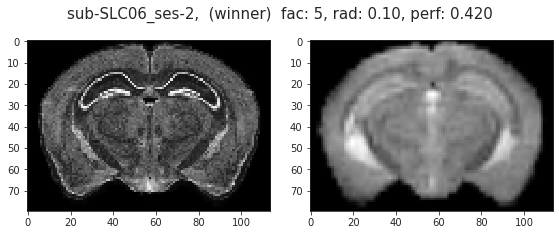

sub-SLC06_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    5 ElasticSyN  0.35       48       25       0.4       mi 0.510513
    5 ElasticSyN  0.35       48       25       0.4  ovp_MOp 0.977758
    5 ElasticSyN  0.35       48       25       0.4  sym_MOp 0.975395
    5 ElasticSyN  0.35       48       25       0.4  ovp_MOs 0.972366
    5 ElasticSyN  0.35       48       25       0.4  sym_MOs 1.000000
    5 ElasticSyN  0.35       48       25       0.4   ovp_SS 0.995633
    5 ElasticSyN  0.35       48       25       0.4   sym_SS 0.976268
    5 ElasticSyN  0.35       48       25       0.4 ovp_VISC 1.000000
    5 ElasticSyN  0.35       48       25       0.4 sym_VISC 0.963964
    5 ElasticSyN  0.35       48       25       0.4  ovp_VIS 0.994810
    5 ElasticSyN  0.35       48       25       0.4  sym_VIS 0.923461
    5 ElasticSyN  0.35       48       25       0.4   ovp_AI 0.951482
    5 ElasticSyN  0.35       48       25       0.4   sym_AI 1.000000
    5 ElasticSyN  0.35       48       25       0.4 ovp_PTLp 0.995984
    5 ElasticSyN  0.35       48       25       0.4 sym_PTLp 0.930233
    5 ElasticSyN  0.35       48       25       0.4  ovp_TEa 1.000000
    5 ElasticSyN  0.35       48       25       0.4  sym_TEa 0.923529
    5 ElasticSyN  0.35       48       25       0.4  ovp_CA1 1.000000
    5 ElasticSyN  0.35       48       25       0.4  sym_CA1 0.968059
    5 ElasticSyN  0.35       48       25       0.4  ovp_CLA 1.000000
    5 ElasticSyN  0.35       48       25       0.4  sym_CLA 0.666667
    5 ElasticSyN  0.35       48       25       0.4 ovp_STRd 1.000000
    5 ElasticSyN  0.35       48       25       0.4 sym_STRd 0.978918
    5 ElasticSyN  0.35       48       25       0.4  ovp_iso 0.984514
    5 ElasticSyN  0.35       48       25       0.4  sym_iso 0.971331
    5 ElasticSyN  0.35       48       25       0.4      sym 0.970507
    5 ElasticSyN  0.35       48       25       0.4      ovp 0.990133

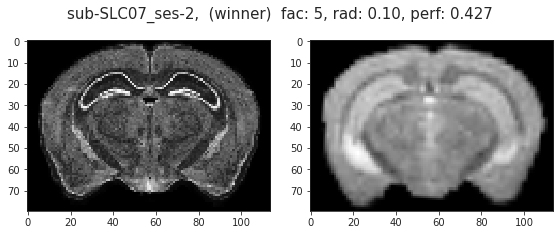

sub-SLC07_ses-2, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    8  SyN  0.38       64       13       0.2       mi 0.519291
    8  SyN  0.38       64       13       0.2  ovp_MOp 0.976190
    8  SyN  0.38       64       13       0.2  sym_MOp 0.984877
    8  SyN  0.38       64       13       0.2  ovp_MOs 0.976980
    8  SyN  0.38       64       13       0.2  sym_MOs 0.981752
    8  SyN  0.38       64       13       0.2   ovp_SS 0.992808
    8  SyN  0.38       64       13       0.2   sym_SS 0.992834
    8  SyN  0.38       64       13       0.2 ovp_VISC 0.978166
    8  SyN  0.38       64       13       0.2 sym_VISC 0.991304
    8  SyN  0.38       64       13       0.2  ovp_VIS 0.990468
    8  SyN  0.38       64       13       0.2  sym_VIS 0.989655
    8  SyN  0.38       64       13       0.2   ovp_AI 0.939353
    8  SyN  0.38       64       13       0.2   sym_AI 1.000000
    8  SyN  0.38       64       13       0.2 ovp_PTLp 1.000000
    8  SyN  0.38       64       13       0.2 sym_PTLp 0.953704
    8  SyN  0.38       64       13       0.2  ovp_TEa 0.992424
    8  SyN  0.38       64       13       0.2  sym_TEa 0.970149
    8  SyN  0.38       64       13       0.2  ovp_CA1 1.000000
    8  SyN  0.38       64       13       0.2  sym_CA1 0.843049
    8  SyN  0.38       64       13       0.2  ovp_CLA 1.000000
    8  SyN  0.38       64       13       0.2  sym_CLA 1.000000
    8  SyN  0.38       64       13       0.2 ovp_STRd 1.000000
    8  SyN  0.38       64       13       0.2 sym_STRd 0.936530
    8  SyN  0.38       64       13       0.2  ovp_iso 0.983009
    8  SyN  0.38       64       13       0.2  sym_iso 0.987210
    8  SyN  0.38       64       13       0.2      sym 0.965456
    8  SyN  0.38       64       13       0.2      ovp 0.987945

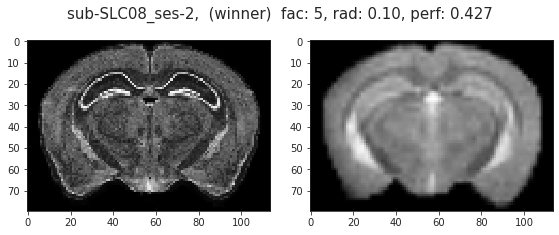

sub-SLC08_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    1 ElasticSyN   0.5       48       13       0.2       mi 0.515905
    1 ElasticSyN   0.5       48       13       0.2  ovp_MOp 0.991589
    1 ElasticSyN   0.5       48       13       0.2  sym_MOp 0.959707
    1 ElasticSyN   0.5       48       13       0.2  ovp_MOs 0.990868
    1 ElasticSyN   0.5       48       13       0.2  sym_MOs 0.987296
    1 ElasticSyN   0.5       48       13       0.2   ovp_SS 0.997839
    1 ElasticSyN   0.5       48       13       0.2   sym_SS 0.988336
    1 ElasticSyN   0.5       48       13       0.2 ovp_VISC 0.995633
    1 ElasticSyN   0.5       48       13       0.2 sym_VISC 0.892562
    1 ElasticSyN   0.5       48       13       0.2  ovp_VIS 1.000000
    1 ElasticSyN   0.5       48       13       0.2  sym_VIS 0.990602
    1 ElasticSyN   0.5       48       13       0.2   ovp_AI 0.929059
    1 ElasticSyN   0.5       48       13       0.2   sym_AI 0.986450
    1 ElasticSyN   0.5       48       13       0.2 ovp_PTLp 1.000000
    1 ElasticSyN   0.5       48       13       0.2 sym_PTLp 0.954128
    1 ElasticSyN   0.5       48       13       0.2  ovp_TEa 1.000000
    1 ElasticSyN   0.5       48       13       0.2  sym_TEa 0.851351
    1 ElasticSyN   0.5       48       13       0.2  ovp_CA1 1.000000
    1 ElasticSyN   0.5       48       13       0.2  sym_CA1 0.738717
    1 ElasticSyN   0.5       48       13       0.2  ovp_CLA 1.000000
    1 ElasticSyN   0.5       48       13       0.2  sym_CLA 0.939394
    1 ElasticSyN   0.5       48       13       0.2 ovp_STRd 1.000000
    1 ElasticSyN   0.5       48       13       0.2 sym_STRd 0.917024
    1 ElasticSyN   0.5       48       13       0.2  ovp_iso 0.990169
    1 ElasticSyN   0.5       48       13       0.2  sym_iso 0.989378
    1 ElasticSyN   0.5       48       13       0.2      sym 0.943893
    1 ElasticSyN   0.5       48       13       0.2      ovp 0.993083

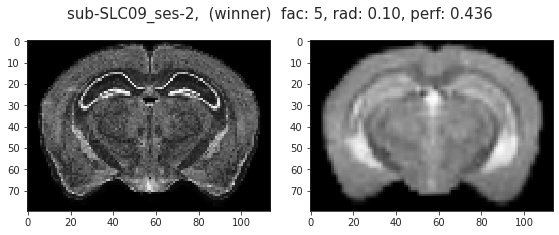

sub-SLC09_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    3 ElasticSyN  0.38       32       13       0.2       mi 0.522184
    3 ElasticSyN  0.38       32       13       0.2  ovp_MOp 0.977915
    3 ElasticSyN  0.38       32       13       0.2  sym_MOp 0.992958
    3 ElasticSyN  0.38       32       13       0.2  ovp_MOs 0.987387
    3 ElasticSyN  0.38       32       13       0.2  sym_MOs 0.957672
    3 ElasticSyN  0.38       32       13       0.2   ovp_SS 0.995471
    3 ElasticSyN  0.38       32       13       0.2   sym_SS 0.998793
    3 ElasticSyN  0.38       32       13       0.2 ovp_VISC 0.977974
    3 ElasticSyN  0.38       32       13       0.2 sym_VISC 0.940171
    3 ElasticSyN  0.38       32       13       0.2  ovp_VIS 0.998387
    3 ElasticSyN  0.38       32       13       0.2  sym_VIS 0.996779
    3 ElasticSyN  0.38       32       13       0.2   ovp_AI 0.921156
    3 ElasticSyN  0.38       32       13       0.2   sym_AI 0.997375
    3 ElasticSyN  0.38       32       13       0.2 ovp_PTLp 1.000000
    3 ElasticSyN  0.38       32       13       0.2 sym_PTLp 0.974576
    3 ElasticSyN  0.38       32       13       0.2  ovp_TEa 0.985348
    3 ElasticSyN  0.38       32       13       0.2  sym_TEa 0.964029
    3 ElasticSyN  0.38       32       13       0.2  ovp_CA1 1.000000
    3 ElasticSyN  0.38       32       13       0.2  sym_CA1 0.993056
    3 ElasticSyN  0.38       32       13       0.2  ovp_CLA 1.000000
    3 ElasticSyN  0.38       32       13       0.2  sym_CLA 0.846154
    3 ElasticSyN  0.38       32       13       0.2 ovp_STRd 1.000000
    3 ElasticSyN  0.38       32       13       0.2 sym_STRd 0.994652
    3 ElasticSyN  0.38       32       13       0.2  ovp_iso 0.983939
    3 ElasticSyN  0.38       32       13       0.2  sym_iso 0.967913
    3 ElasticSyN  0.38       32       13       0.2      sym 0.989116
    3 ElasticSyN  0.38       32       13       0.2      ovp 0.989440

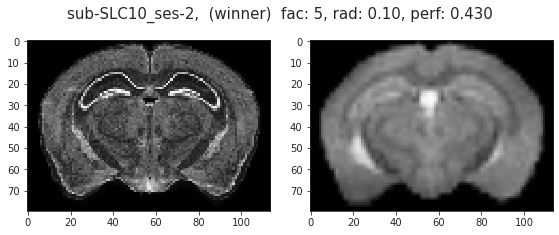

sub-SLC10_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    4 ElasticSyN  0.25       48       20       0.8       mi 0.515885
    4 ElasticSyN  0.25       48       20       0.8  ovp_MOp 0.994475
    4 ElasticSyN  0.25       48       20       0.8  sym_MOp 0.992661
    4 ElasticSyN  0.25       48       20       0.8  ovp_MOs 0.995587
    4 ElasticSyN  0.25       48       20       0.8  sym_MOs 0.956822
    4 ElasticSyN  0.25       48       20       0.8   ovp_SS 0.998146
    4 ElasticSyN  0.25       48       20       0.8   sym_SS 0.998765
    4 ElasticSyN  0.25       48       20       0.8 ovp_VISC 0.995283
    4 ElasticSyN  0.25       48       20       0.8 sym_VISC 0.981308
    4 ElasticSyN  0.25       48       20       0.8  ovp_VIS 1.000000
    4 ElasticSyN  0.25       48       20       0.8  sym_VIS 0.986622
    4 ElasticSyN  0.25       48       20       0.8   ovp_AI 0.970833
    4 ElasticSyN  0.25       48       20       0.8   sym_AI 0.988950
    4 ElasticSyN  0.25       48       20       0.8 ovp_PTLp 1.000000
    4 ElasticSyN  0.25       48       20       0.8 sym_PTLp 0.948276
    4 ElasticSyN  0.25       48       20       0.8  ovp_TEa 1.000000
    4 ElasticSyN  0.25       48       20       0.8  sym_TEa 1.000000
    4 ElasticSyN  0.25       48       20       0.8  ovp_CA1 1.000000
    4 ElasticSyN  0.25       48       20       0.8  sym_CA1 0.989873
    4 ElasticSyN  0.25       48       20       0.8  ovp_CLA 1.000000
    4 ElasticSyN  0.25       48       20       0.8  sym_CLA 0.964286
    4 ElasticSyN  0.25       48       20       0.8 ovp_STRd 1.000000
    4 ElasticSyN  0.25       48       20       0.8 sym_STRd 0.956713
    4 ElasticSyN  0.25       48       20       0.8  ovp_iso 0.993839
    4 ElasticSyN  0.25       48       20       0.8  sym_iso 0.976959
    4 ElasticSyN  0.25       48       20       0.8      sym 0.980803
    4 ElasticSyN  0.25       48       20       0.8      ovp 0.996581

CPU times: user 151d 9h 13min 25s, sys: 3d 13h 12s, total: 154d 22h 13min 38s
Wall time: 8d 8h 12min 14s


In [5]:
%%time

reg.set_mode('bold')
reg.mi_base = None

for key, anat in mice.T1w.items():
    tx, tx_aff = reg.load_tx(key)
    if tx or 'ses-2' not in key:
        continue
    indiv = anat.load_ants()
    indiv *= mice.mask3d[key].load_ants()
    indiv = reg._prepare(indiv)

    results = reg.fit_register(
        name=key,
        moving=indiv,
        fixed=reg.nissl,
        save_results=True,
        **kwargs
    )

## End

Apr 17th, 2022, 11:06 AM

## Test performance

In [11]:
def _bst_tx(name, df_tx, mi_q, verbose=False):
    mi = df_tx.loc[df_tx['metric'] == 'mi']
    sym = df_tx.loc[df_tx['metric'] == 'sym']
    mi = mi.reset_index(drop=True)
    sym = sym.reset_index(drop=True)
    cond = mi['score'] > np.nanquantile(mi['score'], mi_q)
    _df = sym.loc[cond]
    try:
        best_params = _df.iloc[_df['score'].argmax()]
    except ValueError:
        cond = mi['score'] > np.nanquantile(mi['score'], 2 * mi_q / 3)
        _df = sym.loc[cond]
        best_params = _df.iloc[_df['score'].argmax()]
    best_params = best_params.drop(['metric', 'score'])
    best_params = dict(best_params)
    cond = functools.reduce(
        lambda x, y: x & y, [
            df_tx[k] == v for k, v
            in best_params.items()
        ],
    )
    _df = df_tx.loc[cond]
    if verbose:
        msg = f"{name}, perf:\n\n"
        msg += f"{_df.to_string(index=False)}\n"
        print(msg)
    return best_params, _df

### OLD

In [12]:
import fnmatch

pth = '/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/transforms_backup/OLD'
file_names = {}
for sub in range(1, 10 + 1):
    for ses in range(1, 3 + 1):
        key = f"sub-SLC{sub:02d}_ses-{ses}"
        candidates = fnmatch.filter(
            os.listdir(pth),
            f"fit_{key}_(*).df",
        )
        if not len(candidates):
            continue
        file_names[key] = candidates.pop()

In [13]:
dlist = []
for key, name in file_names.items():
    df_tx = pd.read_pickle(pjoin(pth, name))
    for q in [0.5, 0.55, 0.6, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9, 0.95]:
        best_params, _df = _bst_tx(key, df_tx, q, False)
        mi = _df.loc[_df['metric'] == 'mi', 'score'].item()
        sym = _df.loc[_df['metric'] == 'sym', 'score'].item()
        data = {
            'mi': mi,
            'sym': sym,
            **best_params,
        }
        dlist.append({
            'key': [key] * len(data),
            'q': [q] * len(data),
            'label': data.keys(),
            'value': data.values(),
        })
df_final = pd.DataFrame(merge_dicts(dlist))

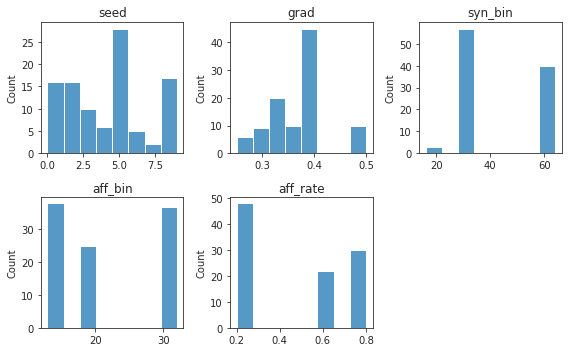

In [14]:
fig, axes = create_figure(2, 3, (8, 5))
trim_axs(axes, 5)
for ax, item in zip(axes.flat, ['seed', 'grad', 'syn_bin', 'aff_bin', 'aff_rate']):
    sns.histplot(df_final.loc[df_final['label'] == item, 'value'].values.tolist(), ax=ax)
    ax.set_title(item)

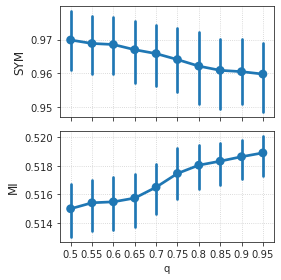

In [15]:
fig, axes = create_figure(2, 1, (4, 4), sharex='all')
sns.pointplot(data=df_final.loc[df_final['label'] == 'sym'], x='q', y='value', ax=axes[0])
sns.pointplot(data=df_final.loc[df_final['label'] == 'mi'], x='q', y='value', ax=axes[1])
axes[0].set_xlabel('')
axes[0].set_ylabel('SYM', fontsize=12)
axes[1].set_ylabel('MI', fontsize=12)
add_grid(axes)
plt.show()

### New

In [26]:
import fnmatch

pth = '/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/transforms_backup/RABIES-version/cache'
file_names = {}
for sub in range(1, 10 + 1):
    for ses in [2]:
        key = f"sub-SLC{sub:02d}_ses-{ses}"
        candidates = fnmatch.filter(
            os.listdir(pth),
            f"perf_{key}_(*).df",
        )
        if not len(candidates):
            continue
        file_names[key] = candidates.pop()

In [27]:
dlist = []
for key, name in file_names.items():
    df_tx = pd.read_pickle(pjoin(pth, name))
    for q in [0.5, 0.55, 0.6, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9, 0.95]:
        best_params, _df = _bst_tx(key, df_tx, q, False)
        mi = _df.loc[_df['metric'] == 'mi', 'score'].item()
        sym = _df.loc[_df['metric'] == 'sym', 'score'].item()
        data = {
            'mi': mi,
            'sym': sym,
            **best_params,
        }
        dlist.append({
            'key': [key] * len(data),
            'q': [q] * len(data),
            'label': data.keys(),
            'value': data.values(),
        })
df_final = pd.DataFrame(merge_dicts(dlist))

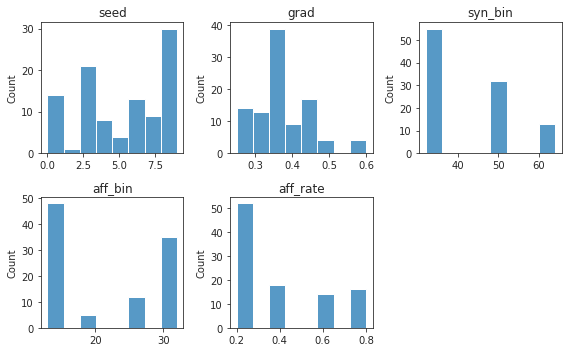

In [29]:
fig, axes = create_figure(2, 3, (8, 5))
trim_axs(axes, 5)
for ax, item in zip(axes.flat, ['seed', 'grad', 'syn_bin', 'aff_bin', 'aff_rate']):
    sns.histplot(df_final.loc[df_final['label'] == item, 'value'].values.tolist(), ax=ax)
    ax.set_title(item)

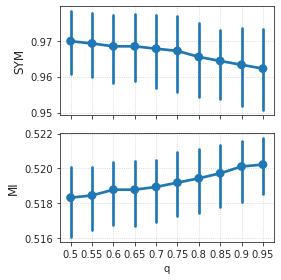

In [30]:
fig, axes = create_figure(2, 1, (4, 4), sharex='all')
sns.pointplot(data=df_final.loc[df_final['label'] == 'sym'], x='q', y='value', ax=axes[0])
sns.pointplot(data=df_final.loc[df_final['label'] == 'mi'], x='q', y='value', ax=axes[1])
axes[0].set_xlabel('')
axes[0].set_ylabel('SYM', fontsize=12)
axes[1].set_ylabel('MI', fontsize=12)
add_grid(axes)
plt.show()

## Compare: side by side

In [38]:
dlist = [] 

### Old

In [39]:
pth = '/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/transforms_backup/OLD'
file_names = {}
for sub in range(1, 10 + 1):
    for ses in [2]:
        key = f"sub-SLC{sub:02d}_ses-{ses}"
        candidates = fnmatch.filter(
            os.listdir(pth),
            f"fit_{key}_(*).df",
        )
        if not len(candidates):
            continue
        file_names[key] = candidates.pop()
        
for key, name in file_names.items():
    df_tx = pd.read_pickle(pjoin(pth, name))
    _, perf = reg._bst_tx(key, df_tx, 0.50)
    dlist.append({
        'key': [key],
        'sym': [perf],
        'tag': ['Old'],
    })

sub-SLC01_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    9 ElasticSyN  0.28       64       13       0.6       mi 0.515712
    9 ElasticSyN  0.28       64       13       0.6  ovp_MOp 0.990663
    9 ElasticSyN  0.28       64       13       0.6  sym_MOp 0.972376
    9 ElasticSyN  0.28       64       13       0.6  ovp_MOs 0.985205
    9 ElasticSyN  0.28       64       13       0.6  sym_MOs 0.991334
    9 ElasticSyN  0.28       64       13       0.6   ovp_SS 0.997000
    9 ElasticSyN  0.28       64       13       0.6   sym_SS 0.988663
    9 ElasticSyN  0.28       64       13       0.6 ovp_VISC 0.995708
    9 ElasticSyN  0.28       64       13       0.6 sym_VISC 0.925620
    9 ElasticSyN  0.28       64       13       0.6  ovp_VIS 0.999121
    9 ElasticSyN  0.28       64       13       0.6  sym_VIS 0.986038
    9 ElasticSyN  0.28       64       13       0.6   ovp_AI 0.931034
    9 ElasticSyN  0.28       64       13       0.6   sym_AI 0.986301
    9 ElasticSyN  0.28       64       13       0.6 ovp_PTLp 1.000000
    9 ElasticSyN  0.28       64       13       0.6 sym_PTLp 0.972727
    9 ElasticSyN  0.28       64       13       0.6  ovp_TEa 1.000000
    9 ElasticSyN  0.28       64       13       0.6  sym_TEa 0.915493
    9 ElasticSyN  0.28       64       13       0.6  ovp_CA1 1.000000
    9 ElasticSyN  0.28       64       13       0.6  sym_CA1 0.893665
    9 ElasticSyN  0.28       64       13       0.6  ovp_CLA 1.000000
    9 ElasticSyN  0.28       64       13       0.6  sym_CLA 0.964286
    9 ElasticSyN  0.28       64       13       0.6 ovp_STRd 1.000000
    9 ElasticSyN  0.28       64       13       0.6 sym_STRd 0.997856
    9 ElasticSyN  0.28       64       13       0.6  ovp_iso 0.989255
    9 ElasticSyN  0.28       64       13       0.6  sym_iso 0.981494
    9 ElasticSyN  0.28       64       13       0.6      sym 0.977608
    9 ElasticSyN  0.28       64       13       0.6      ovp 0.992205

sub-SLC02_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    4 ElasticSyN  0.32       64       32       0.6       mi 0.517971
    4 ElasticSyN  0.32       64       32       0.6  ovp_MOp 0.994470
    4 ElasticSyN  0.32       64       32       0.6  sym_MOp 0.923759
    4 ElasticSyN  0.32       64       32       0.6  ovp_MOs 0.999133
    4 ElasticSyN  0.32       64       32       0.6  sym_MOs 0.947635
    4 ElasticSyN  0.32       64       32       0.6   ovp_SS 1.000000
    4 ElasticSyN  0.32       64       32       0.6   sym_SS 0.979114
    4 ElasticSyN  0.32       64       32       0.6 ovp_VISC 0.990654
    4 ElasticSyN  0.32       64       32       0.6 sym_VISC 0.963303
    4 ElasticSyN  0.32       64       32       0.6  ovp_VIS 1.000000
    4 ElasticSyN  0.32       64       32       0.6  sym_VIS 0.978761
    4 ElasticSyN  0.32       64       32       0.6   ovp_AI 0.965309
    4 ElasticSyN  0.32       64       32       0.6   sym_AI 0.973214
    4 ElasticSyN  0.32       64       32       0.6 ovp_PTLp 1.000000
    4 ElasticSyN  0.32       64       32       0.6 sym_PTLp 0.936937
    4 ElasticSyN  0.32       64       32       0.6  ovp_TEa 1.000000
    4 ElasticSyN  0.32       64       32       0.6  sym_TEa 0.992248
    4 ElasticSyN  0.32       64       32       0.6  ovp_CA1 1.000000
    4 ElasticSyN  0.32       64       32       0.6  sym_CA1 0.942446
    4 ElasticSyN  0.32       64       32       0.6  ovp_CLA 1.000000
    4 ElasticSyN  0.32       64       32       0.6  sym_CLA 0.843750
    4 ElasticSyN  0.32       64       32       0.6 ovp_STRd 1.000000
    4 ElasticSyN  0.32       64       32       0.6 sym_STRd 0.923420
    4 ElasticSyN  0.32       64       32       0.6  ovp_iso 0.995571
    4 ElasticSyN  0.32       64       32       0.6  sym_iso 1.000000
    4 ElasticSyN  0.32       64       32       0.6      sym 0.954152
    4 ElasticSyN  0.32       64       32       0.6      ovp 0.997014

sub-SLC03_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    2 ElasticSyN  0.35       64       13       0.8       mi 0.515555
    2 ElasticSyN  0.35       64       13       0.8  ovp_MOp 0.985929
    2 ElasticSyN  0.35       64       13       0.8  sym_MOp 0.966790
    2 ElasticSyN  0.35       64       13       0.8  ovp_MOs 0.996276
    2 ElasticSyN  0.35       64       13       0.8  sym_MOs 0.942134
    2 ElasticSyN  0.35       64       13       0.8   ovp_SS 0.992707
    2 ElasticSyN  0.35       64       13       0.8   sym_SS 0.995755
    2 ElasticSyN  0.35       64       13       0.8 ovp_VISC 0.991189
    2 ElasticSyN  0.35       64       13       0.8 sym_VISC 0.991228
    2 ElasticSyN  0.35       64       13       0.8  ovp_VIS 0.993311
    2 ElasticSyN  0.35       64       13       0.8  sym_VIS 0.993333
    2 ElasticSyN  0.35       64       13       0.8   ovp_AI 0.952120
    2 ElasticSyN  0.35       64       13       0.8   sym_AI 0.965054
    2 ElasticSyN  0.35       64       13       0.8 ovp_PTLp 0.995726
    2 ElasticSyN  0.35       64       13       0.8 sym_PTLp 0.983051
    2 ElasticSyN  0.35       64       13       0.8  ovp_TEa 1.000000
    2 ElasticSyN  0.35       64       13       0.8  sym_TEa 0.898734
    2 ElasticSyN  0.35       64       13       0.8  ovp_CA1 1.000000
    2 ElasticSyN  0.35       64       13       0.8  sym_CA1 0.861233
    2 ElasticSyN  0.35       64       13       0.8  ovp_CLA 1.000000
    2 ElasticSyN  0.35       64       13       0.8  sym_CLA 0.967742
    2 ElasticSyN  0.35       64       13       0.8 ovp_STRd 1.000000
    2 ElasticSyN  0.35       64       13       0.8 sym_STRd 0.991758
    2 ElasticSyN  0.35       64       13       0.8  ovp_iso 0.989174
    2 ElasticSyN  0.35       64       13       0.8  sym_iso 0.969564
    2 ElasticSyN  0.35       64       13       0.8      sym 0.970329
    2 ElasticSyN  0.35       64       13       0.8      ovp 0.992326

sub-SLC04_ses-2, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    8  SyN  0.25       64       20       0.8       mi 0.516059
    8  SyN  0.25       64       20       0.8  ovp_MOp 0.986807
    8  SyN  0.25       64       20       0.8  sym_MOp 0.998243
    8  SyN  0.25       64       20       0.8  ovp_MOs 0.989673
    8  SyN  0.25       64       20       0.8  sym_MOs 0.996564
    8  SyN  0.25       64       20       0.8   ovp_SS 0.998596
    8  SyN  0.25       64       20       0.8   sym_SS 0.989944
    8  SyN  0.25       64       20       0.8 ovp_VISC 1.000000
    8  SyN  0.25       64       20       0.8 sym_VISC 0.983740
    8  SyN  0.25       64       20       0.8  ovp_VIS 0.998400
    8  SyN  0.25       64       20       0.8  sym_VIS 0.993620
    8  SyN  0.25       64       20       0.8   ovp_AI 0.952685
    8  SyN  0.25       64       20       0.8   sym_AI 0.994898
    8  SyN  0.25       64       20       0.8 ovp_PTLp 1.000000
    8  SyN  0.25       64       20       0.8 sym_PTLp 0.943089
    8  SyN  0.25       64       20       0.8  ovp_TEa 1.000000
    8  SyN  0.25       64       20       0.8  sym_TEa 0.939597
    8  SyN  0.25       64       20       0.8  ovp_CA1 1.000000
    8  SyN  0.25       64       20       0.8  sym_CA1 0.870518
    8  SyN  0.25       64       20       0.8  ovp_CLA 1.000000
    8  SyN  0.25       64       20       0.8  sym_CLA 0.783784
    8  SyN  0.25       64       20       0.8 ovp_STRd 1.000000
    8  SyN  0.25       64       20       0.8 sym_STRd 0.996619
    8  SyN  0.25       64       20       0.8  ovp_iso 0.991937
    8  SyN  0.25       64       20       0.8  sym_iso 0.969947
    8  SyN  0.25       64       20       0.8      sym 0.980407
    8  SyN  0.25       64       20       0.8      ovp 0.994135

sub-SLC05_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    3 ElasticSyN  0.39       64       13       0.8       mi 0.515422
    3 ElasticSyN  0.39       64       13       0.8  ovp_MOp 0.999077
    3 ElasticSyN  0.39       64       13       0.8  sym_MOp 0.981718
    3 ElasticSyN  0.39       64       13       0.8  ovp_MOs 0.996454
    3 ElasticSyN  0.39       64       13       0.8  sym_MOs 0.948187
    3 ElasticSyN  0.39       64       13       0.8   ovp_SS 0.998800
    3 ElasticSyN  0.39       64       13       0.8   sym_SS 0.991632
    3 ElasticSyN  0.39       64       13       0.8 ovp_VISC 0.995575
    3 ElasticSyN  0.39       64       13       0.8 sym_VISC 0.965217
    3 ElasticSyN  0.39       64       13       0.8  ovp_VIS 1.000000
    3 ElasticSyN  0.39       64       13       0.8  sym_VIS 0.994845
    3 ElasticSyN  0.39       64       13       0.8   ovp_AI 0.958506
    3 ElasticSyN  0.39       64       13       0.8   sym_AI 0.991736
    3 ElasticSyN  0.39       64       13       0.8 ovp_PTLp 1.000000
    3 ElasticSyN  0.39       64       13       0.8 sym_PTLp 0.945455
    3 ElasticSyN  0.39       64       13       0.8  ovp_TEa 1.000000
    3 ElasticSyN  0.39       64       13       0.8  sym_TEa 0.859873
    3 ElasticSyN  0.39       64       13       0.8  ovp_CA1 1.000000
    3 ElasticSyN  0.39       64       13       0.8  sym_CA1 0.950739
    3 ElasticSyN  0.39       64       13       0.8  ovp_CLA 1.000000
    3 ElasticSyN  0.39       64       13       0.8  sym_CLA 0.823529
    3 ElasticSyN  0.39       64       13       0.8 ovp_STRd 1.000000
    3 ElasticSyN  0.39       64       13       0.8 sym_STRd 0.974101
    3 ElasticSyN  0.39       64       13       0.8  ovp_iso 0.995762
    3 ElasticSyN  0.39       64       13       0.8  sym_iso 0.989585
    3 ElasticSyN  0.39       64       13       0.8      sym 0.973956
    3 ElasticSyN  0.39       64       13       0.8      ovp 0.996492

sub-SLC06_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    6 ElasticSyN  0.39       16       13       0.2       mi 0.508633
    6 ElasticSyN  0.39       16       13       0.2  ovp_MOp 0.985348
    6 ElasticSyN  0.39       16       13       0.2  sym_MOp 0.989071
    6 ElasticSyN  0.39       16       13       0.2  ovp_MOs 0.984808
    6 ElasticSyN  0.39       16       13       0.2  sym_MOs 0.991103
    6 ElasticSyN  0.39       16       13       0.2   ovp_SS 0.999238
    6 ElasticSyN  0.39       16       13       0.2   sym_SS 0.990389
    6 ElasticSyN  0.39       16       13       0.2 ovp_VISC 0.992620
    6 ElasticSyN  0.39       16       13       0.2 sym_VISC 0.978102
    6 ElasticSyN  0.39       16       13       0.2  ovp_VIS 0.999096
    6 ElasticSyN  0.39       16       13       0.2  sym_VIS 0.910190
    6 ElasticSyN  0.39       16       13       0.2   ovp_AI 0.925599
    6 ElasticSyN  0.39       16       13       0.2   sym_AI 0.977556
    6 ElasticSyN  0.39       16       13       0.2 ovp_PTLp 1.000000
    6 ElasticSyN  0.39       16       13       0.2 sym_PTLp 0.867188
    6 ElasticSyN  0.39       16       13       0.2  ovp_TEa 1.000000
    6 ElasticSyN  0.39       16       13       0.2  sym_TEa 0.982759
    6 ElasticSyN  0.39       16       13       0.2  ovp_CA1 1.000000
    6 ElasticSyN  0.39       16       13       0.2  sym_CA1 0.996988
    6 ElasticSyN  0.39       16       13       0.2  ovp_CLA 1.000000
    6 ElasticSyN  0.39       16       13       0.2  sym_CLA 0.888889
    6 ElasticSyN  0.39       16       13       0.2 ovp_STRd 1.000000
    6 ElasticSyN  0.39       16       13       0.2 sym_STRd 0.933190
    6 ElasticSyN  0.39       16       13       0.2  ovp_iso 0.988989
    6 ElasticSyN  0.39       16       13       0.2  sym_iso 0.986934
    6 ElasticSyN  0.39       16       13       0.2      sym 0.966020
    6 ElasticSyN  0.39       16       13       0.2      ovp 0.991869

sub-SLC07_ses-2, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    5  SyN  0.25       64       32       0.8       mi 0.516234
    5  SyN  0.25       64       32       0.8  ovp_MOp 0.981326
    5  SyN  0.25       64       32       0.8  sym_MOp 0.987013
    5  SyN  0.25       64       32       0.8  ovp_MOs 0.989700
    5  SyN  0.25       64       32       0.8  sym_MOs 1.000000
    5  SyN  0.25       64       32       0.8   ovp_SS 0.994484
    5  SyN  0.25       64       32       0.8   sym_SS 0.990848
    5  SyN  0.25       64       32       0.8 ovp_VISC 1.000000
    5  SyN  0.25       64       32       0.8 sym_VISC 0.941176
    5  SyN  0.25       64       32       0.8  ovp_VIS 0.999211
    5  SyN  0.25       64       32       0.8  sym_VIS 0.976599
    5  SyN  0.25       64       32       0.8   ovp_AI 0.939808
    5  SyN  0.25       64       32       0.8   sym_AI 0.954545
    5  SyN  0.25       64       32       0.8 ovp_PTLp 1.000000
    5  SyN  0.25       64       32       0.8 sym_PTLp 0.950000
    5  SyN  0.25       64       32       0.8  ovp_TEa 0.996454
    5  SyN  0.25       64       32       0.8  sym_TEa 0.867550
    5  SyN  0.25       64       32       0.8  ovp_CA1 1.000000
    5  SyN  0.25       64       32       0.8  sym_CA1 0.823404
    5  SyN  0.25       64       32       0.8  ovp_CLA 1.000000
    5  SyN  0.25       64       32       0.8  sym_CLA 0.806452
    5  SyN  0.25       64       32       0.8 ovp_STRd 1.000000
    5  SyN  0.25       64       32       0.8 sym_STRd 0.945927
    5  SyN  0.25       64       32       0.8  ovp_iso 0.988134
    5  SyN  0.25       64       32       0.8  sym_iso 0.976222
    5  SyN  0.25       64       32       0.8      sym 0.958624
    5  SyN  0.25       64       32       0.8      ovp 0.991709

sub-SLC08_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    0 ElasticSyN  0.37       64       13       0.2       mi 0.510726
    0 ElasticSyN  0.37       64       13       0.2  ovp_MOp 0.990214
    0 ElasticSyN  0.37       64       13       0.2  sym_MOp 0.921368
    0 ElasticSyN  0.37       64       13       0.2  ovp_MOs 0.996584
    0 ElasticSyN  0.37       64       13       0.2  sym_MOs 0.991497
    0 ElasticSyN  0.37       64       13       0.2   ovp_SS 0.997102
    0 ElasticSyN  0.37       64       13       0.2   sym_SS 0.989049
    0 ElasticSyN  0.37       64       13       0.2 ovp_VISC 1.000000
    0 ElasticSyN  0.37       64       13       0.2 sym_VISC 0.840000
    0 ElasticSyN  0.37       64       13       0.2  ovp_VIS 0.997460
    0 ElasticSyN  0.37       64       13       0.2  sym_VIS 0.974916
    0 ElasticSyN  0.37       64       13       0.2   ovp_AI 0.934605
    0 ElasticSyN  0.37       64       13       0.2   sym_AI 0.994565
    0 ElasticSyN  0.37       64       13       0.2 ovp_PTLp 1.000000
    0 ElasticSyN  0.37       64       13       0.2 sym_PTLp 0.958333
    0 ElasticSyN  0.37       64       13       0.2  ovp_TEa 1.000000
    0 ElasticSyN  0.37       64       13       0.2  sym_TEa 0.878981
    0 ElasticSyN  0.37       64       13       0.2  ovp_CA1 1.000000
    0 ElasticSyN  0.37       64       13       0.2  sym_CA1 0.823666
    0 ElasticSyN  0.37       64       13       0.2  ovp_CLA 1.000000
    0 ElasticSyN  0.37       64       13       0.2  sym_CLA 1.000000
    0 ElasticSyN  0.37       64       13       0.2 ovp_STRd 1.000000
    0 ElasticSyN  0.37       64       13       0.2 sym_STRd 0.900556
    0 ElasticSyN  0.37       64       13       0.2  ovp_iso 0.990929
    0 ElasticSyN  0.37       64       13       0.2  sym_iso 0.986129
    0 ElasticSyN  0.37       64       13       0.2      sym 0.943441
    0 ElasticSyN  0.37       64       13       0.2      ovp 0.993522

sub-SLC09_ses-2, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    5  SyN   0.4       32       13       0.2       mi 0.519319
    5  SyN   0.4       32       13       0.2  ovp_MOp 0.984155
    5  SyN   0.4       32       13       0.2  sym_MOp 0.968804
    5  SyN   0.4       32       13       0.2  ovp_MOs 0.989455
    5  SyN   0.4       32       13       0.2  sym_MOs 0.962069
    5  SyN   0.4       32       13       0.2   ovp_SS 0.996241
    5  SyN   0.4       32       13       0.2   sym_SS 0.990789
    5  SyN   0.4       32       13       0.2 ovp_VISC 0.986607
    5  SyN   0.4       32       13       0.2 sym_VISC 0.982301
    5  SyN   0.4       32       13       0.2  ovp_VIS 0.995912
    5  SyN   0.4       32       13       0.2  sym_VIS 0.995106
    5  SyN   0.4       32       13       0.2   ovp_AI 0.954208
    5  SyN   0.4       32       13       0.2   sym_AI 1.000000
    5  SyN   0.4       32       13       0.2 ovp_PTLp 1.000000
    5  SyN   0.4       32       13       0.2 sym_PTLp 0.950413
    5  SyN   0.4       32       13       0.2  ovp_TEa 0.996540
    5  SyN   0.4       32       13       0.2  sym_TEa 0.979452
    5  SyN   0.4       32       13       0.2  ovp_CA1 1.000000
    5  SyN   0.4       32       13       0.2  sym_CA1 0.984018
    5  SyN   0.4       32       13       0.2  ovp_CLA 1.000000
    5  SyN   0.4       32       13       0.2  sym_CLA 0.825000
    5  SyN   0.4       32       13       0.2 ovp_STRd 1.000000
    5  SyN   0.4       32       13       0.2 sym_STRd 0.993377
    5  SyN   0.4       32       13       0.2  ovp_iso 0.990201
    5  SyN   0.4       32       13       0.2  sym_iso 0.987648
    5  SyN   0.4       32       13       0.2      sym 0.984801
    5  SyN   0.4       32       13       0.2      ovp 0.992719

sub-SLC10_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    6 ElasticSyN  0.35       64       20       0.6       mi 0.514254
    6 ElasticSyN  0.35       64       20       0.6  ovp_MOp 0.981366
    6 ElasticSyN  0.35       64       20       0.6  sym_MOp 0.984155
    6 ElasticSyN  0.35       64       20       0.6  ovp_MOs 0.990598
    6 ElasticSyN  0.35       64       20       0.6  sym_MOs 1.000000
    6 ElasticSyN  0.35       64       20       0.6   ovp_SS 0.998493
    6 ElasticSyN  0.35       64       20       0.6   sym_SS 0.998193
    6 ElasticSyN  0.35       64       20       0.6 ovp_VISC 1.000000
    6 ElasticSyN  0.35       64       20       0.6 sym_VISC 0.991150
    6 ElasticSyN  0.35       64       20       0.6  ovp_VIS 1.000000
    6 ElasticSyN  0.35       64       20       0.6  sym_VIS 0.996727
    6 ElasticSyN  0.35       64       20       0.6   ovp_AI 0.964237
    6 ElasticSyN  0.35       64       20       0.6   sym_AI 0.964865
    6 ElasticSyN  0.35       64       20       0.6 ovp_PTLp 1.000000
    6 ElasticSyN  0.35       64       20       0.6 sym_PTLp 0.956522
    6 ElasticSyN  0.35       64       20       0.6  ovp_TEa 1.000000
    6 ElasticSyN  0.35       64       20       0.6  sym_TEa 0.986207
    6 ElasticSyN  0.35       64       20       0.6  ovp_CA1 1.000000
    6 ElasticSyN  0.35       64       20       0.6  sym_CA1 0.992366
    6 ElasticSyN  0.35       64       20       0.6  ovp_CLA 1.000000
    6 ElasticSyN  0.35       64       20       0.6  sym_CLA 0.866667
    6 ElasticSyN  0.35       64       20       0.6 ovp_STRd 1.000000
    6 ElasticSyN  0.35       64       20       0.6 sym_STRd 0.984093
    6 ElasticSyN  0.35       64       20       0.6  ovp_iso 0.991236
    6 ElasticSyN  0.35       64       20       0.6  sym_iso 0.984061
    6 ElasticSyN  0.35       64       20       0.6      sym 0.989531
    6 ElasticSyN  0.35       64       20       0.6      ovp 0.994615

### New

In [40]:
pth = '/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/transforms_backup/RABIES-version/cache'
file_names = {}
for sub in range(1, 10 + 1):
    for ses in [2]:
        key = f"sub-SLC{sub:02d}_ses-{ses}"
        candidates = fnmatch.filter(
            os.listdir(pth),
            f"perf_{key}_(*).df",
        )
        if not len(candidates):
            continue
        file_names[key] = candidates.pop()

for key, name in file_names.items():
    df_tx = pd.read_pickle(pjoin(pth, name))
    _, perf = reg._bst_tx(key, df_tx, 0.50)
    dlist.append({
        'key': [key],
        'sym': [perf],
        'tag': ['New'],
    })

sub-SLC01_ses-2, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    6  SyN   0.3       32       13       0.2       mi 0.519031
    6  SyN   0.3       32       13       0.2  ovp_MOp 0.990826
    6  SyN   0.3       32       13       0.2  sym_MOp 0.996337
    6  SyN   0.3       32       13       0.2  ovp_MOs 0.985714
    6  SyN   0.3       32       13       0.2  sym_MOs 0.992883
    6  SyN   0.3       32       13       0.2   ovp_SS 0.998510
    6  SyN   0.3       32       13       0.2   sym_SS 0.994058
    6  SyN   0.3       32       13       0.2 ovp_VISC 0.996063
    6  SyN   0.3       32       13       0.2 sym_VISC 0.924242
    6  SyN   0.3       32       13       0.2  ovp_VIS 0.998115
    6  SyN   0.3       32       13       0.2  sym_VIS 0.998117
    6  SyN   0.3       32       13       0.2   ovp_AI 0.931635
    6  SyN   0.3       32       13       0.2   sym_AI 0.994652
    6  SyN   0.3       32       13       0.2 ovp_PTLp 1.000000
    6  SyN   0.3       32       13       0.2 sym_PTLp 0.990909
    6  SyN   0.3       32       13       0.2  ovp_TEa 1.000000
    6  SyN   0.3       32       13       0.2  sym_TEa 0.917808
    6  SyN   0.3       32       13       0.2  ovp_CA1 1.000000
    6  SyN   0.3       32       13       0.2  sym_CA1 0.894484
    6  SyN   0.3       32       13       0.2  ovp_CLA 1.000000
    6  SyN   0.3       32       13       0.2  sym_CLA 0.962963
    6  SyN   0.3       32       13       0.2 ovp_STRd 1.000000
    6  SyN   0.3       32       13       0.2 sym_STRd 0.987708
    6  SyN   0.3       32       13       0.2  ovp_iso 0.989145
    6  SyN   0.3       32       13       0.2  sym_iso 0.970607
    6  SyN   0.3       32       13       0.2      sym 0.981588
    6  SyN   0.3       32       13       0.2      ovp 0.992616

sub-SLC02_ses-2, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    6  SyN  0.45       48       13       0.2       mi 0.520428
    6  SyN  0.45       48       13       0.2  ovp_MOp 0.983441
    6  SyN  0.45       48       13       0.2  sym_MOp 0.903678
    6  SyN  0.45       48       13       0.2  ovp_MOs 0.995560
    6  SyN  0.45       48       13       0.2  sym_MOs 0.895623
    6  SyN  0.45       48       13       0.2   ovp_SS 0.998397
    6  SyN  0.45       48       13       0.2   sym_SS 0.991066
    6  SyN  0.45       48       13       0.2 ovp_VISC 1.000000
    6  SyN  0.45       48       13       0.2 sym_VISC 0.980952
    6  SyN  0.45       48       13       0.2  ovp_VIS 0.998047
    6  SyN  0.45       48       13       0.2  sym_VIS 0.992218
    6  SyN  0.45       48       13       0.2   ovp_AI 0.964789
    6  SyN  0.45       48       13       0.2   sym_AI 1.000000
    6  SyN  0.45       48       13       0.2 ovp_PTLp 1.000000
    6  SyN  0.45       48       13       0.2 sym_PTLp 0.962963
    6  SyN  0.45       48       13       0.2  ovp_TEa 1.000000
    6  SyN  0.45       48       13       0.2  sym_TEa 0.976744
    6  SyN  0.45       48       13       0.2  ovp_CA1 1.000000
    6  SyN  0.45       48       13       0.2  sym_CA1 0.928753
    6  SyN  0.45       48       13       0.2  ovp_CLA 1.000000
    6  SyN  0.45       48       13       0.2  sym_CLA 0.878788
    6  SyN  0.45       48       13       0.2 ovp_STRd 1.000000
    6  SyN  0.45       48       13       0.2 sym_STRd 0.892726
    6  SyN  0.45       48       13       0.2  ovp_iso 0.992681
    6  SyN  0.45       48       13       0.2  sym_iso 0.991152
    6  SyN  0.45       48       13       0.2      sym 0.946231
    6  SyN  0.45       48       13       0.2      ovp 0.995126

sub-SLC03_ses-2, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    8  SyN  0.25       48       32       0.2       mi 0.520844
    8  SyN  0.25       48       32       0.2  ovp_MOp 0.985650
    8  SyN  0.25       48       32       0.2  sym_MOp 0.994633
    8  SyN  0.25       48       32       0.2  ovp_MOs 0.990179
    8  SyN  0.25       48       32       0.2  sym_MOs 0.921098
    8  SyN  0.25       48       32       0.2   ovp_SS 0.992549
    8  SyN  0.25       48       32       0.2   sym_SS 0.999379
    8  SyN  0.25       48       32       0.2 ovp_VISC 0.995595
    8  SyN  0.25       48       32       0.2 sym_VISC 0.991228
    8  SyN  0.25       48       32       0.2  ovp_VIS 1.000000
    8  SyN  0.25       48       32       0.2  sym_VIS 0.991243
    8  SyN  0.25       48       32       0.2   ovp_AI 0.937922
    8  SyN  0.25       48       32       0.2   sym_AI 0.976000
    8  SyN  0.25       48       32       0.2 ovp_PTLp 1.000000
    8  SyN  0.25       48       32       0.2 sym_PTLp 0.947826
    8  SyN  0.25       48       32       0.2  ovp_TEa 1.000000
    8  SyN  0.25       48       32       0.2  sym_TEa 0.881250
    8  SyN  0.25       48       32       0.2  ovp_CA1 1.000000
    8  SyN  0.25       48       32       0.2  sym_CA1 0.875278
    8  SyN  0.25       48       32       0.2  ovp_CLA 1.000000
    8  SyN  0.25       48       32       0.2  sym_CLA 0.966667
    8  SyN  0.25       48       32       0.2 ovp_STRd 1.000000
    8  SyN  0.25       48       32       0.2 sym_STRd 0.985345
    8  SyN  0.25       48       32       0.2  ovp_iso 0.988334
    8  SyN  0.25       48       32       0.2  sym_iso 0.976449
    8  SyN  0.25       48       32       0.2      sym 0.970783
    8  SyN  0.25       48       32       0.2      ovp 0.991607

sub-SLC04_ses-2, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    7  SyN  0.38       64       32       0.2       mi 0.520412
    7  SyN  0.38       64       32       0.2  ovp_MOp 0.997220
    7  SyN  0.38       64       32       0.2  sym_MOp 0.961818
    7  SyN  0.38       64       32       0.2  ovp_MOs 0.997290
    7  SyN  0.38       64       32       0.2  sym_MOs 0.952381
    7  SyN  0.38       64       32       0.2   ovp_SS 0.998301
    7  SyN  0.38       64       32       0.2   sym_SS 0.997172
    7  SyN  0.38       64       32       0.2 ovp_VISC 0.995833
    7  SyN  0.38       64       32       0.2 sym_VISC 0.951220
    7  SyN  0.38       64       32       0.2  ovp_VIS 0.989992
    7  SyN  0.38       64       32       0.2  sym_VIS 0.998462
    7  SyN  0.38       64       32       0.2   ovp_AI 0.978289
    7  SyN  0.38       64       32       0.2   sym_AI 0.992366
    7  SyN  0.38       64       32       0.2 ovp_PTLp 1.000000
    7  SyN  0.38       64       32       0.2 sym_PTLp 0.903226
    7  SyN  0.38       64       32       0.2  ovp_TEa 0.993080
    7  SyN  0.38       64       32       0.2  sym_TEa 0.979452
    7  SyN  0.38       64       32       0.2  ovp_CA1 1.000000
    7  SyN  0.38       64       32       0.2  sym_CA1 0.858974
    7  SyN  0.38       64       32       0.2  ovp_CLA 1.000000
    7  SyN  0.38       64       32       0.2  sym_CLA 0.966667
    7  SyN  0.38       64       32       0.2 ovp_STRd 1.000000
    7  SyN  0.38       64       32       0.2 sym_STRd 0.984171
    7  SyN  0.38       64       32       0.2  ovp_iso 0.993638
    7  SyN  0.38       64       32       0.2  sym_iso 0.966839
    7  SyN  0.38       64       32       0.2      sym 0.971524
    7  SyN  0.38       64       32       0.2      ovp 0.996278

sub-SLC05_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    3 ElasticSyN  0.45       48       32       0.8       mi 0.518692
    3 ElasticSyN  0.45       48       32       0.8  ovp_MOp 0.997227
    3 ElasticSyN  0.45       48       32       0.8  sym_MOp 0.992634
    3 ElasticSyN  0.45       48       32       0.8  ovp_MOs 0.996180
    3 ElasticSyN  0.45       48       32       0.8  sym_MOs 0.971751
    3 ElasticSyN  0.45       48       32       0.8   ovp_SS 0.997373
    3 ElasticSyN  0.45       48       32       0.8   sym_SS 0.991860
    3 ElasticSyN  0.45       48       32       0.8 ovp_VISC 0.995556
    3 ElasticSyN  0.45       48       32       0.8 sym_VISC 0.939655
    3 ElasticSyN  0.45       48       32       0.8  ovp_VIS 0.997407
    3 ElasticSyN  0.45       48       32       0.8  sym_VIS 0.998273
    3 ElasticSyN  0.45       48       32       0.8   ovp_AI 0.950213
    3 ElasticSyN  0.45       48       32       0.8   sym_AI 0.991501
    3 ElasticSyN  0.45       48       32       0.8 ovp_PTLp 1.000000
    3 ElasticSyN  0.45       48       32       0.8 sym_PTLp 0.924370
    3 ElasticSyN  0.45       48       32       0.8  ovp_TEa 0.989547
    3 ElasticSyN  0.45       48       32       0.8  sym_TEa 0.965753
    3 ElasticSyN  0.45       48       32       0.8  ovp_CA1 1.000000
    3 ElasticSyN  0.45       48       32       0.8  sym_CA1 0.989446
    3 ElasticSyN  0.45       48       32       0.8  ovp_CLA 1.000000
    3 ElasticSyN  0.45       48       32       0.8  sym_CLA 0.903226
    3 ElasticSyN  0.45       48       32       0.8 ovp_STRd 1.000000
    3 ElasticSyN  0.45       48       32       0.8 sym_STRd 0.953947
    3 ElasticSyN  0.45       48       32       0.8  ovp_iso 0.992337
    3 ElasticSyN  0.45       48       32       0.8  sym_iso 0.998668
    3 ElasticSyN  0.45       48       32       0.8      sym 0.978940
    3 ElasticSyN  0.45       48       32       0.8      ovp 0.994837

sub-SLC06_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    5 ElasticSyN  0.35       48       25       0.4       mi 0.510513
    5 ElasticSyN  0.35       48       25       0.4  ovp_MOp 0.977758
    5 ElasticSyN  0.35       48       25       0.4  sym_MOp 0.975395
    5 ElasticSyN  0.35       48       25       0.4  ovp_MOs 0.972366
    5 ElasticSyN  0.35       48       25       0.4  sym_MOs 1.000000
    5 ElasticSyN  0.35       48       25       0.4   ovp_SS 0.995633
    5 ElasticSyN  0.35       48       25       0.4   sym_SS 0.976268
    5 ElasticSyN  0.35       48       25       0.4 ovp_VISC 1.000000
    5 ElasticSyN  0.35       48       25       0.4 sym_VISC 0.963964
    5 ElasticSyN  0.35       48       25       0.4  ovp_VIS 0.994810
    5 ElasticSyN  0.35       48       25       0.4  sym_VIS 0.923461
    5 ElasticSyN  0.35       48       25       0.4   ovp_AI 0.951482
    5 ElasticSyN  0.35       48       25       0.4   sym_AI 1.000000
    5 ElasticSyN  0.35       48       25       0.4 ovp_PTLp 0.995984
    5 ElasticSyN  0.35       48       25       0.4 sym_PTLp 0.930233
    5 ElasticSyN  0.35       48       25       0.4  ovp_TEa 1.000000
    5 ElasticSyN  0.35       48       25       0.4  sym_TEa 0.923529
    5 ElasticSyN  0.35       48       25       0.4  ovp_CA1 1.000000
    5 ElasticSyN  0.35       48       25       0.4  sym_CA1 0.968059
    5 ElasticSyN  0.35       48       25       0.4  ovp_CLA 1.000000
    5 ElasticSyN  0.35       48       25       0.4  sym_CLA 0.666667
    5 ElasticSyN  0.35       48       25       0.4 ovp_STRd 1.000000
    5 ElasticSyN  0.35       48       25       0.4 sym_STRd 0.978918
    5 ElasticSyN  0.35       48       25       0.4  ovp_iso 0.984514
    5 ElasticSyN  0.35       48       25       0.4  sym_iso 0.971331
    5 ElasticSyN  0.35       48       25       0.4      sym 0.970507
    5 ElasticSyN  0.35       48       25       0.4      ovp 0.990133

sub-SLC07_ses-2, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    8  SyN  0.38       64       13       0.2       mi 0.519291
    8  SyN  0.38       64       13       0.2  ovp_MOp 0.976190
    8  SyN  0.38       64       13       0.2  sym_MOp 0.984877
    8  SyN  0.38       64       13       0.2  ovp_MOs 0.976980
    8  SyN  0.38       64       13       0.2  sym_MOs 0.981752
    8  SyN  0.38       64       13       0.2   ovp_SS 0.992808
    8  SyN  0.38       64       13       0.2   sym_SS 0.992834
    8  SyN  0.38       64       13       0.2 ovp_VISC 0.978166
    8  SyN  0.38       64       13       0.2 sym_VISC 0.991304
    8  SyN  0.38       64       13       0.2  ovp_VIS 0.990468
    8  SyN  0.38       64       13       0.2  sym_VIS 0.989655
    8  SyN  0.38       64       13       0.2   ovp_AI 0.939353
    8  SyN  0.38       64       13       0.2   sym_AI 1.000000
    8  SyN  0.38       64       13       0.2 ovp_PTLp 1.000000
    8  SyN  0.38       64       13       0.2 sym_PTLp 0.953704
    8  SyN  0.38       64       13       0.2  ovp_TEa 0.992424
    8  SyN  0.38       64       13       0.2  sym_TEa 0.970149
    8  SyN  0.38       64       13       0.2  ovp_CA1 1.000000
    8  SyN  0.38       64       13       0.2  sym_CA1 0.843049
    8  SyN  0.38       64       13       0.2  ovp_CLA 1.000000
    8  SyN  0.38       64       13       0.2  sym_CLA 1.000000
    8  SyN  0.38       64       13       0.2 ovp_STRd 1.000000
    8  SyN  0.38       64       13       0.2 sym_STRd 0.936530
    8  SyN  0.38       64       13       0.2  ovp_iso 0.983009
    8  SyN  0.38       64       13       0.2  sym_iso 0.987210
    8  SyN  0.38       64       13       0.2      sym 0.965456
    8  SyN  0.38       64       13       0.2      ovp 0.987945

sub-SLC08_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    1 ElasticSyN   0.5       48       13       0.2       mi 0.515905
    1 ElasticSyN   0.5       48       13       0.2  ovp_MOp 0.991589
    1 ElasticSyN   0.5       48       13       0.2  sym_MOp 0.959707
    1 ElasticSyN   0.5       48       13       0.2  ovp_MOs 0.990868
    1 ElasticSyN   0.5       48       13       0.2  sym_MOs 0.987296
    1 ElasticSyN   0.5       48       13       0.2   ovp_SS 0.997839
    1 ElasticSyN   0.5       48       13       0.2   sym_SS 0.988336
    1 ElasticSyN   0.5       48       13       0.2 ovp_VISC 0.995633
    1 ElasticSyN   0.5       48       13       0.2 sym_VISC 0.892562
    1 ElasticSyN   0.5       48       13       0.2  ovp_VIS 1.000000
    1 ElasticSyN   0.5       48       13       0.2  sym_VIS 0.990602
    1 ElasticSyN   0.5       48       13       0.2   ovp_AI 0.929059
    1 ElasticSyN   0.5       48       13       0.2   sym_AI 0.986450
    1 ElasticSyN   0.5       48       13       0.2 ovp_PTLp 1.000000
    1 ElasticSyN   0.5       48       13       0.2 sym_PTLp 0.954128
    1 ElasticSyN   0.5       48       13       0.2  ovp_TEa 1.000000
    1 ElasticSyN   0.5       48       13       0.2  sym_TEa 0.851351
    1 ElasticSyN   0.5       48       13       0.2  ovp_CA1 1.000000
    1 ElasticSyN   0.5       48       13       0.2  sym_CA1 0.738717
    1 ElasticSyN   0.5       48       13       0.2  ovp_CLA 1.000000
    1 ElasticSyN   0.5       48       13       0.2  sym_CLA 0.939394
    1 ElasticSyN   0.5       48       13       0.2 ovp_STRd 1.000000
    1 ElasticSyN   0.5       48       13       0.2 sym_STRd 0.917024
    1 ElasticSyN   0.5       48       13       0.2  ovp_iso 0.990169
    1 ElasticSyN   0.5       48       13       0.2  sym_iso 0.989378
    1 ElasticSyN   0.5       48       13       0.2      sym 0.943893
    1 ElasticSyN   0.5       48       13       0.2      ovp 0.993083

sub-SLC09_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    3 ElasticSyN  0.38       32       13       0.2       mi 0.522184
    3 ElasticSyN  0.38       32       13       0.2  ovp_MOp 0.977915
    3 ElasticSyN  0.38       32       13       0.2  sym_MOp 0.992958
    3 ElasticSyN  0.38       32       13       0.2  ovp_MOs 0.987387
    3 ElasticSyN  0.38       32       13       0.2  sym_MOs 0.957672
    3 ElasticSyN  0.38       32       13       0.2   ovp_SS 0.995471
    3 ElasticSyN  0.38       32       13       0.2   sym_SS 0.998793
    3 ElasticSyN  0.38       32       13       0.2 ovp_VISC 0.977974
    3 ElasticSyN  0.38       32       13       0.2 sym_VISC 0.940171
    3 ElasticSyN  0.38       32       13       0.2  ovp_VIS 0.998387
    3 ElasticSyN  0.38       32       13       0.2  sym_VIS 0.996779
    3 ElasticSyN  0.38       32       13       0.2   ovp_AI 0.921156
    3 ElasticSyN  0.38       32       13       0.2   sym_AI 0.997375
    3 ElasticSyN  0.38       32       13       0.2 ovp_PTLp 1.000000
    3 ElasticSyN  0.38       32       13       0.2 sym_PTLp 0.974576
    3 ElasticSyN  0.38       32       13       0.2  ovp_TEa 0.985348
    3 ElasticSyN  0.38       32       13       0.2  sym_TEa 0.964029
    3 ElasticSyN  0.38       32       13       0.2  ovp_CA1 1.000000
    3 ElasticSyN  0.38       32       13       0.2  sym_CA1 0.993056
    3 ElasticSyN  0.38       32       13       0.2  ovp_CLA 1.000000
    3 ElasticSyN  0.38       32       13       0.2  sym_CLA 0.846154
    3 ElasticSyN  0.38       32       13       0.2 ovp_STRd 1.000000
    3 ElasticSyN  0.38       32       13       0.2 sym_STRd 0.994652
    3 ElasticSyN  0.38       32       13       0.2  ovp_iso 0.983939
    3 ElasticSyN  0.38       32       13       0.2  sym_iso 0.967913
    3 ElasticSyN  0.38       32       13       0.2      sym 0.989116
    3 ElasticSyN  0.38       32       13       0.2      ovp 0.989440

sub-SLC10_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    4 ElasticSyN  0.25       48       20       0.8       mi 0.515885
    4 ElasticSyN  0.25       48       20       0.8  ovp_MOp 0.994475
    4 ElasticSyN  0.25       48       20       0.8  sym_MOp 0.992661
    4 ElasticSyN  0.25       48       20       0.8  ovp_MOs 0.995587
    4 ElasticSyN  0.25       48       20       0.8  sym_MOs 0.956822
    4 ElasticSyN  0.25       48       20       0.8   ovp_SS 0.998146
    4 ElasticSyN  0.25       48       20       0.8   sym_SS 0.998765
    4 ElasticSyN  0.25       48       20       0.8 ovp_VISC 0.995283
    4 ElasticSyN  0.25       48       20       0.8 sym_VISC 0.981308
    4 ElasticSyN  0.25       48       20       0.8  ovp_VIS 1.000000
    4 ElasticSyN  0.25       48       20       0.8  sym_VIS 0.986622
    4 ElasticSyN  0.25       48       20       0.8   ovp_AI 0.970833
    4 ElasticSyN  0.25       48       20       0.8   sym_AI 0.988950
    4 ElasticSyN  0.25       48       20       0.8 ovp_PTLp 1.000000
    4 ElasticSyN  0.25       48       20       0.8 sym_PTLp 0.948276
    4 ElasticSyN  0.25       48       20       0.8  ovp_TEa 1.000000
    4 ElasticSyN  0.25       48       20       0.8  sym_TEa 1.000000
    4 ElasticSyN  0.25       48       20       0.8  ovp_CA1 1.000000
    4 ElasticSyN  0.25       48       20       0.8  sym_CA1 0.989873
    4 ElasticSyN  0.25       48       20       0.8  ovp_CLA 1.000000
    4 ElasticSyN  0.25       48       20       0.8  sym_CLA 0.964286
    4 ElasticSyN  0.25       48       20       0.8 ovp_STRd 1.000000
    4 ElasticSyN  0.25       48       20       0.8 sym_STRd 0.956713
    4 ElasticSyN  0.25       48       20       0.8  ovp_iso 0.993839
    4 ElasticSyN  0.25       48       20       0.8  sym_iso 0.976959
    4 ElasticSyN  0.25       48       20       0.8      sym 0.980803
    4 ElasticSyN  0.25       48       20       0.8      ovp 0.996581

In [52]:
df = pd.DataFrame(merge_dicts(dlist))
df

,key,sym,tag
0,sub-SLC01_ses-2,0.977608,Old
1,sub-SLC02_ses-2,0.954152,Old
2,sub-SLC03_ses-2,0.970329,Old
3,sub-SLC04_ses-2,0.980407,Old
4,sub-SLC05_ses-2,0.973956,Old
5,sub-SLC06_ses-2,0.966020,Old
6,sub-SLC07_ses-2,0.958624,Old
7,sub-SLC08_ses-2,0.943441,Old
8,sub-SLC09_ses-2,0.984801,Old
9,sub-SLC10_ses-2,0.989531,Old


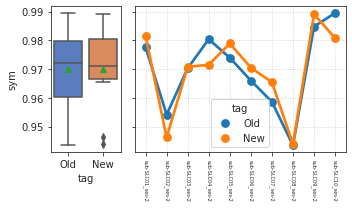

In [72]:
fig, axes = create_figure(1, 2, figsize=(5, 3), sharey='all', width_ratios=[1, 3])
sns.boxplot(
    data=df,
    x='tag',
    y='sym',
    palette='muted',
    showmeans=True,
    ax=axes[0],
)
sns.pointplot(
    data=df,
    x='key',
    y='sym',
    hue='tag',
    ax=axes[1],
)
axes[1].tick_params(axis='x', rotation=-90, labelsize=5)
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].grid()
plt.show()